In [2]:
def get_current_dir():
    import os
    from pathlib import Path
    try:
        return Path(__file__).parent.absolute()
    except NameError:
        return Path(os.getcwd())

results = get_current_dir().parent / "data" / "results.csv"
results_authors = get_current_dir().parent / "data" / "results-authors.csv"

import pandas as pd
actual = pd.read_csv(results)
expected = pd.read_csv(results_authors)

for alpha_ent in [0.30, 0.40]:
    for alpha_word in [0.2, 0.3, 0.4, 0.5]:
        for k in [20, 50, 100, 200]:
            
            assert expected[(expected["alpha_ent"] == alpha_ent) & (expected["alpha_word"] == alpha_word) & (expected["k"] == k)].shape[0] == 1
            
            for n_topics in [10, 20, 50, 100]:
                for n_neighbours in [5, 10, 20, 500]:
            
                    assert actual[(actual["alpha_ent"] == alpha_ent) & (actual["alpha_word"] == alpha_word) & (actual["k"] == k) & (actual["n_topics"] == n_topics) & (actual["n_neighbours"] == n_neighbours)].shape[0] == 1

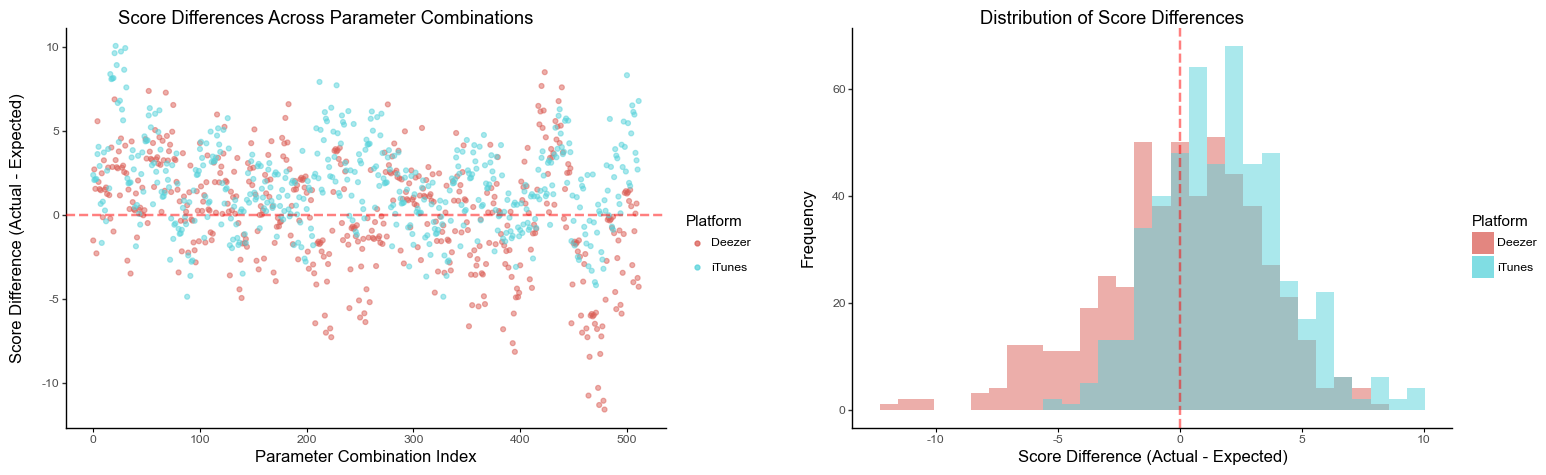

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
def get_current_dir():
    import os
    from pathlib import Path
    try:
        return Path(__file__).parent.absolute()
    except NameError:
        return Path(os.getcwd())

results = get_current_dir().parent / "data" / "results.csv"
results_authors = get_current_dir().parent / "data" / "results-authors.csv"

import pandas as pd
actual = pd.read_csv(results)
expected = pd.read_csv(results_authors)

import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display_html

deezer_differences = []
itunes_differences = []
params = []

# from paper
for alpha_ent in [0.30, 0.40]:
    for alpha_word in [0.2, 0.3, 0.4, 0.5]:
        for k in [20, 50, 100, 200]:
            expected_row = expected[(expected["alpha_ent"] == alpha_ent) & (expected["alpha_word"] == alpha_word) & (expected["k"] == k)]
            
            expected_score_deezer = expected_row["score_deezer"].values[0]
            expected_score_itunes = expected_row["score_itunes"].values[0]

            # my guesses
            for n_topics in [10, 20, 50, 100]:
                for n_neighbours in [5, 10, 20, 500]:
                    actual_row = actual[(actual["alpha_ent"] == alpha_ent) & (actual["alpha_word"] == alpha_word) & (actual["k"] == k) & (actual["n_topics"] == n_topics) & (actual["n_neighbours"] == n_neighbours)]
                    
                    actual_score_deezer = actual_row["score_deezer"].values[0]
                    actual_score_itunes = actual_row["score_itunes"].values[0]
                    
                    deezer_differences.append(actual_score_deezer - expected_score_deezer)
                    itunes_differences.append(actual_score_itunes - expected_score_itunes)
                    params.append({
                        'alpha_ent': alpha_ent,
                        'alpha_word': alpha_word,
                        'k': k,
                        'n_topics': n_topics,
                        'n_neighbours': n_neighbours
                    })

df = pd.DataFrame({
    'index': range(len(deezer_differences)),
    'Deezer': deezer_differences,
    'iTunes': itunes_differences,
    'alpha_ent': [p['alpha_ent'] for p in params],
    'alpha_word': [p['alpha_word'] for p in params],
    'k': [p['k'] for p in params],
    'n_topics': [p['n_topics'] for p in params],
    'n_neighbours': [p['n_neighbours'] for p in params]
})

df_melted = pd.melt(df, id_vars=['index', 'alpha_ent', 'alpha_word', 'k', 'n_topics', 'n_neighbours'], 
                    value_vars=['Deezer', 'iTunes'], 
                    var_name='Platform', value_name='Difference')

scatter_plot = (
    ggplot(df_melted, aes(x='index', y='Difference', color='Platform')) +
    geom_point(alpha=0.5) +
    geom_hline(yintercept=0, linetype='dashed', color='red', alpha=0.5, size=1) +
    labs(x='Parameter Combination Index', 
         y='Score Difference (Actual - Expected)', 
         title='Score Differences Across Parameter Combinations') +
    theme_classic()
)
histogram = (
    ggplot(df_melted, aes(x='Difference', fill='Platform')) +
    geom_histogram(alpha=0.5, position='identity', bins=30) +
    geom_vline(xintercept=0, linetype='dashed', color='red', alpha=0.5, size=1) +
    labs(x='Score Difference (Actual - Expected)', 
         y='Frequency', 
         title='Distribution of Score Differences') +
    theme_classic()
)

import patchworklib as pw

scatter_pw = pw.load_ggplot(scatter_plot, figsize=(6, 4))
histogram_pw = pw.load_ggplot(histogram, figsize=(6, 4))

combined_plot = scatter_pw | histogram_pw

combined_plot.savefig("diff.png")

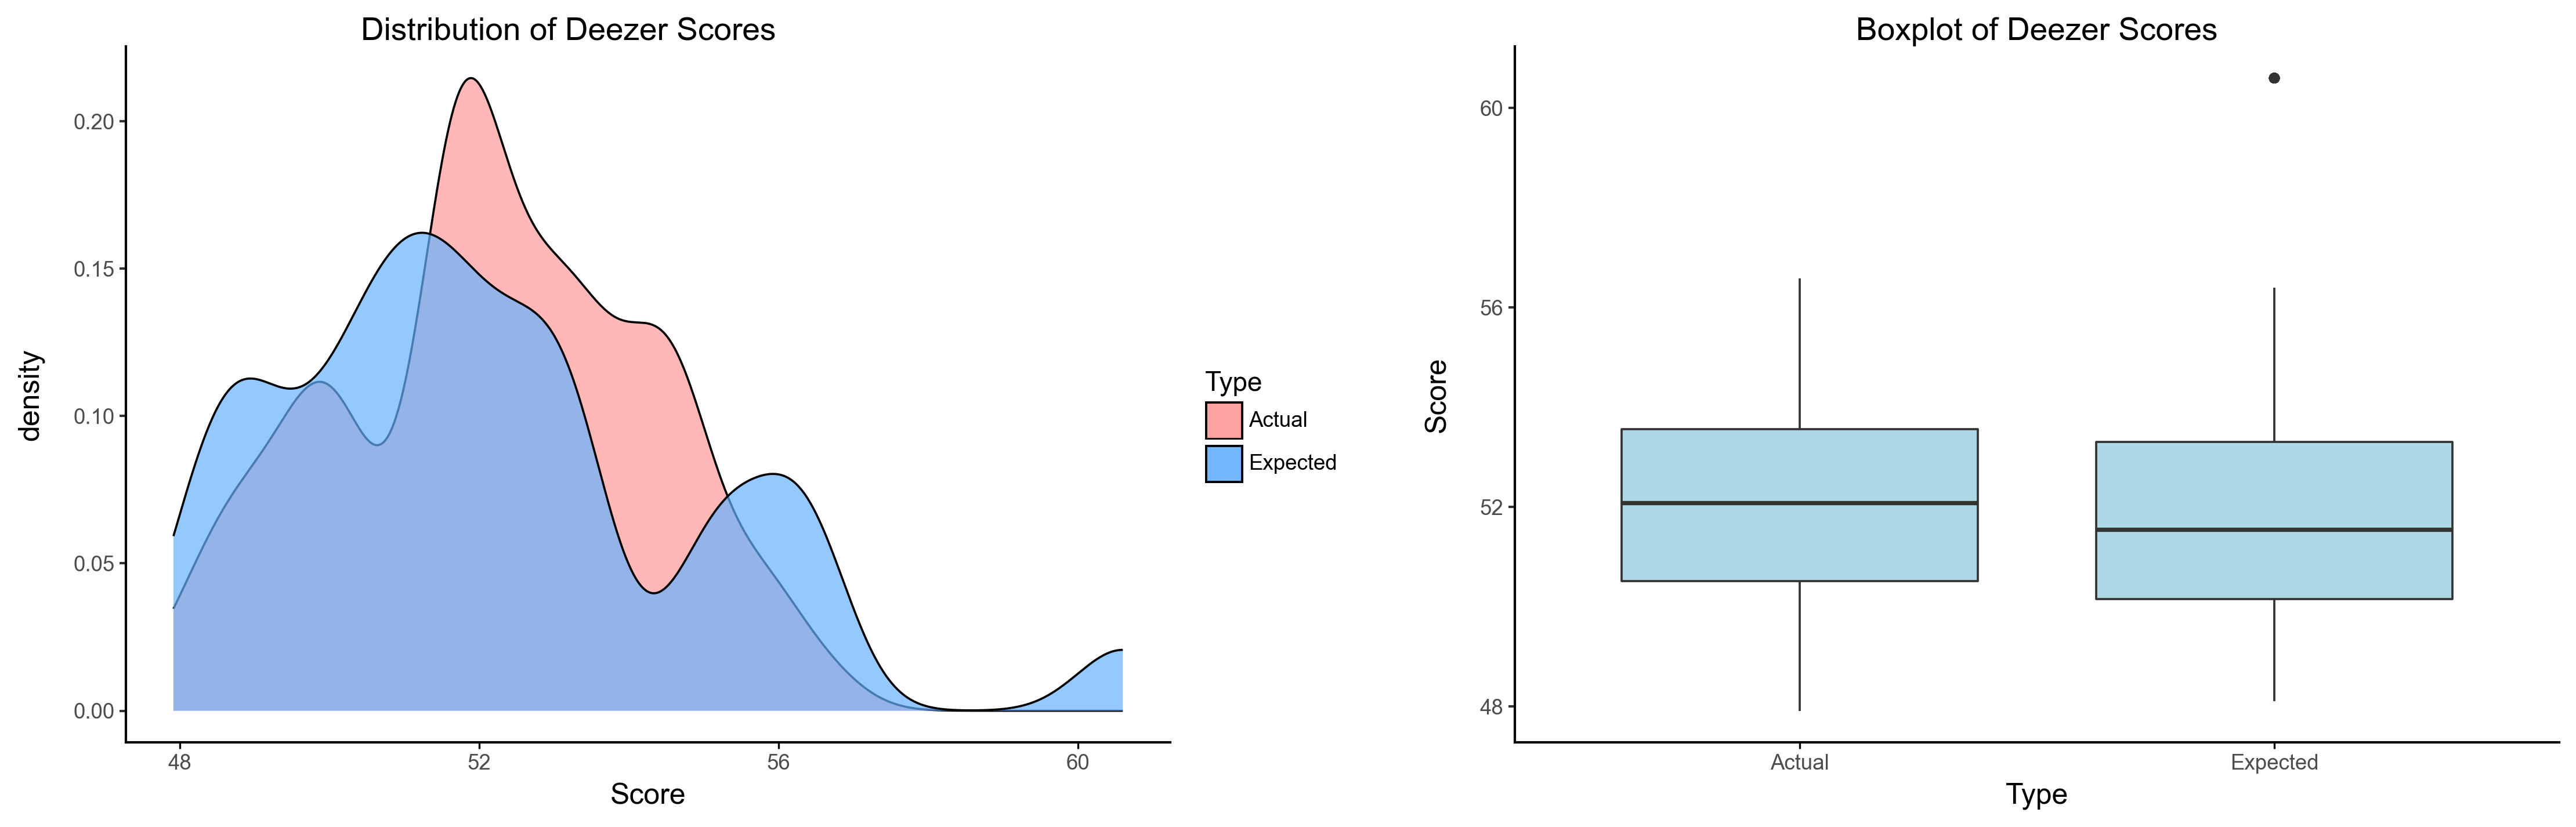

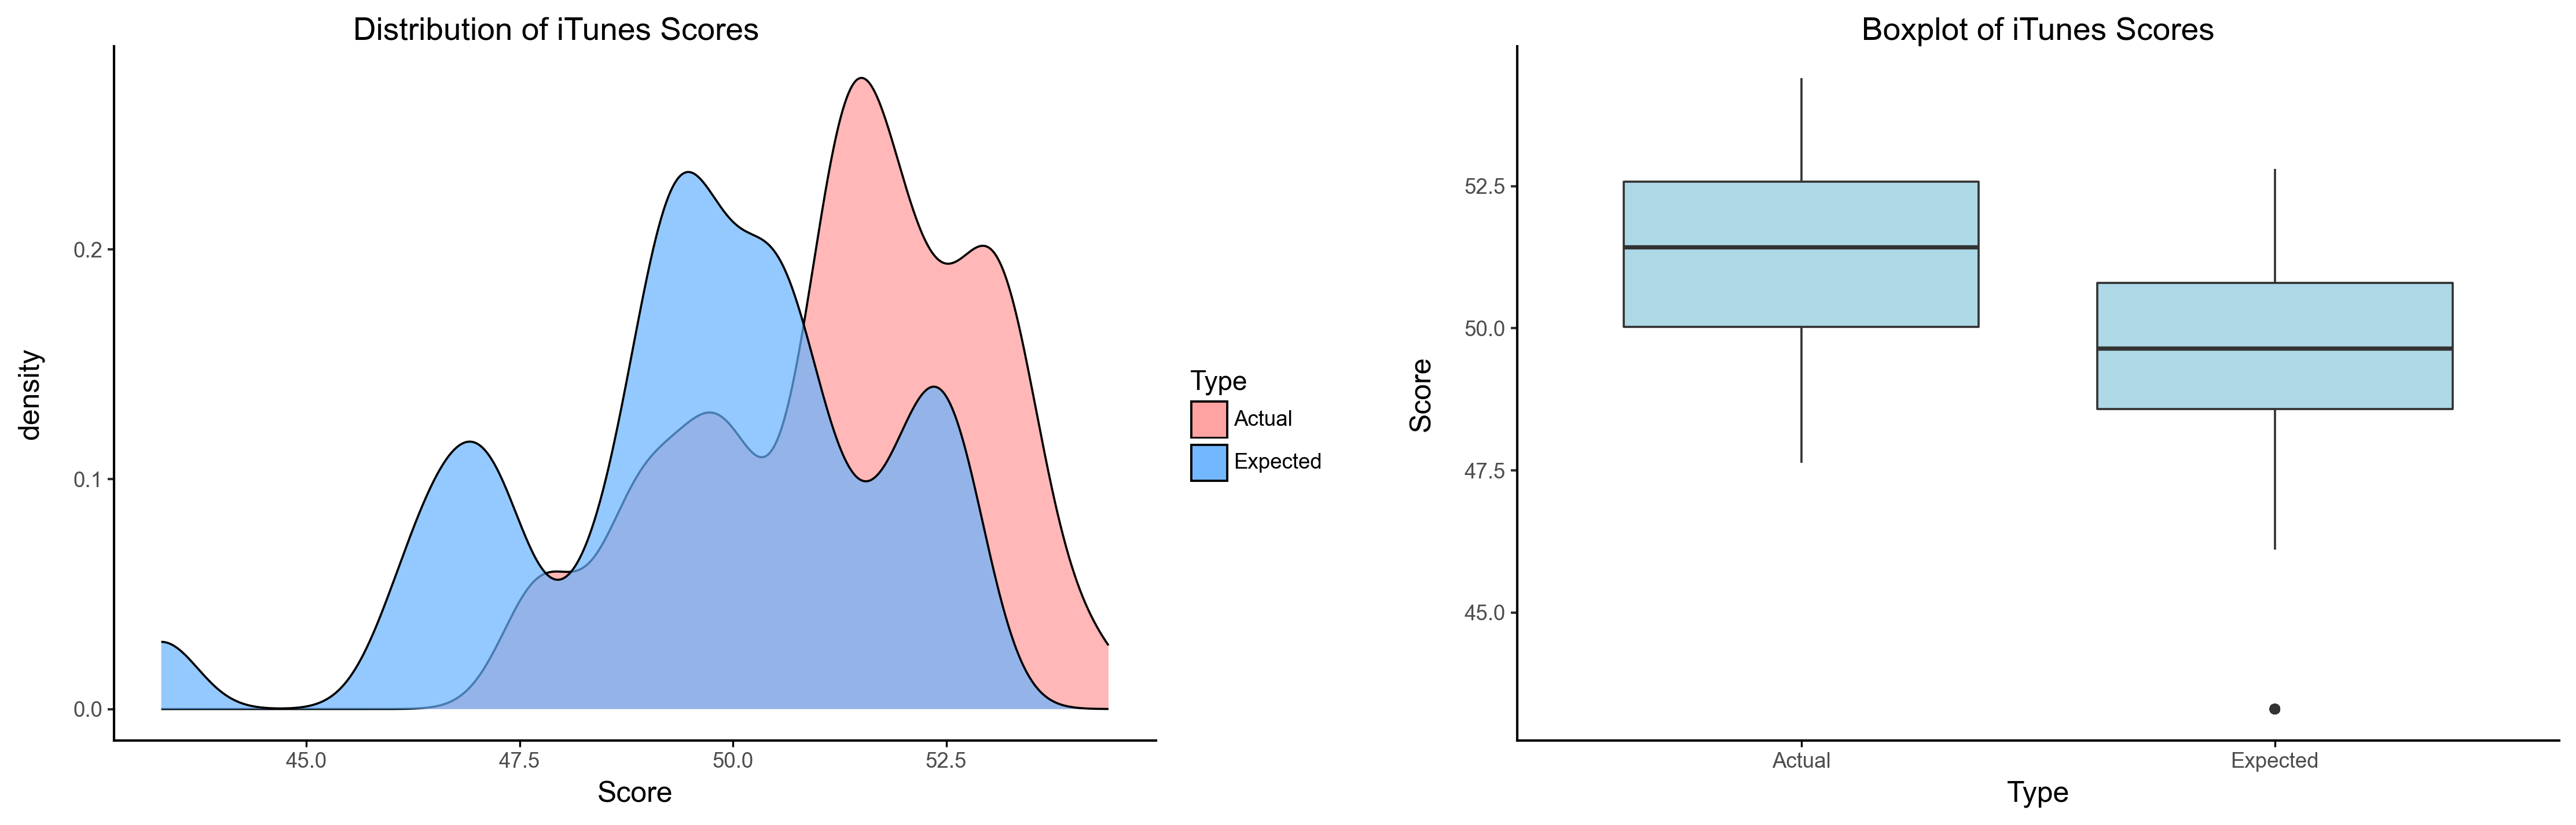

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from plotnine import *

def plot(actual_scores, expected_scores, score_type):
    df = pd.DataFrame({
        'Score': actual_scores + expected_scores,
        'Type': ['Actual'] * len(actual_scores) + ['Expected'] * len(expected_scores)
    })

    p1 = (ggplot(df, aes(x='Score', fill='Type'))
          + geom_density(alpha=0.7)
          + labs(title=f'Distribution of {score_type} Scores')
          + theme_classic()
          + scale_fill_manual(values=["#FF9999", "#66B2FF"]))

    p2 = (ggplot(df, aes(x='Type', y='Score'))
          + geom_boxplot(fill="lightblue")
          + labs(title=f'Boxplot of {score_type} Scores')
          + theme_classic())

    import patchworklib as pw

    p1_pw = pw.load_ggplot(p1, figsize=(6, 4))
    p2_pw = pw.load_ggplot(p2, figsize=(6, 4))
    combined_plot = p1_pw | p2_pw
    # combined_plot.savefig(f"{score_type}.png")
    display(combined_plot)

actual_scores_deezer = []
expected_scores_deezer = []
actual_scores_itunes = []
expected_scores_itunes = []

for alpha_ent in [0.30, 0.40]:
    for alpha_word in [0.2, 0.3, 0.4, 0.5]:
        for k in [20, 50, 100, 200]:
            expected_row = expected[(expected["alpha_ent"] == alpha_ent) & (expected["alpha_word"] == alpha_word) & (expected["k"] == k)]
            
            expected_score_deezer = expected_row["score_deezer"].values[0]
            expected_score_itunes = expected_row["score_itunes"].values[0]
            
            for n_topics in [10, 20, 50, 100]:
                for n_neighbours in [5, 10, 20, 500]:
                    actual_row = actual[(actual["alpha_ent"] == alpha_ent) & (actual["alpha_word"] == alpha_word) & (actual["k"] == k) & (actual["n_topics"] == n_topics) & (actual["n_neighbours"] == n_neighbours)]
                    
                    if not actual_row.empty:
                        actual_score_deezer = actual_row["score_deezer"].values[0]
                        actual_score_itunes = actual_row["score_itunes"].values[0]
                        
                        actual_scores_deezer.append(actual_score_deezer)
                        expected_scores_deezer.append(expected_score_deezer)
                        actual_scores_itunes.append(actual_score_itunes)
                        expected_scores_itunes.append(expected_score_itunes)

plot(actual_scores_deezer, expected_scores_deezer, "Deezer")
plot(actual_scores_itunes, expected_scores_itunes, "iTunes")
